In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder

In [2]:
new_1 = pd.read_csv('training_set_features.csv', index_col='respondent_id')
new_2 = pd.read_csv('training_set_labels.csv', index_col='respondent_id')
new_2

,xyz_vaccine,seasonal_vaccine
respondent_id,,
0,0,0
1,0,1
2,0,0
3,0,1
4,0,0
...,...,...
26702,0,0
26703,0,0
26704,0,1


In [3]:
new_3 = pd.concat([new_1,new_2], axis=1)
new_3

,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_xyz,...,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,xyz_vaccine,seasonal_vaccine
respondent_id,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0,0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,...,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,0,1
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,Own,Not in Labor Force,qufhixun,Non-MSA,0.0,0.0,NaN,NaN,0,0
26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,Rent,Employed,lzgpxyit,"MSA, Principle City",1.0,0.0,fcxhlnwr,cmhcxjea,0,0
26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,...,Own,NaN,lzgpxyit,"MSA, Not Principle City",0.0,0.0,NaN,NaN,0,1


# data cleaning

In [4]:
new_4 = new_3.copy()

In [8]:
new_4.isnull().sum().sort_values()
# new_4.employment_occupation.unique()
new_4.drop(columns=['employment_occupation','employment_industry','health_insurance'],inplace=True)

In [10]:
new_4.select_dtypes(include=['object']).isnull().sum()

age_group               0
education            1407
race                    0
sex                     0
income_poverty       4423
marital_status       1408
rent_or_own          2042
employment_status    1463
hhs_geo_region          0
census_msa              0
dtype: int64

In [11]:
new_4.age_group.isnull().sum()

0

In [12]:
def convert_age_group(age_group):
        # Split the string by ' - ' to get the lower and upper bounds
        parts = age_group.replace(' Years', '').split(' - ')
        if len(parts) == 2:
            return (float(parts[0]) + float(parts[1])) / 2
        # Handle the '65+ Years' case
        elif '65+' in age_group:
            return 65.0
        else:
            return None

In [13]:
new_5 = new_4.copy()
new_5.age_group = new_5.age_group.apply(convert_age_group)

In [14]:
new_5.select_dtypes(include=['object'])

,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa
respondent_id,,,,,,,,,
0,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA
1,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City"
2,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City"
3,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City"
4,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City"
...,...,...,...,...,...,...,...,...,...
26702,Some College,White,Female,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,qufhixun,Non-MSA
26703,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Rent,Employed,lzgpxyit,"MSA, Principle City"
26704,Some College,White,Female,NaN,Not Married,Own,NaN,lzgpxyit,"MSA, Not Principle City"


In [21]:
new_6 = new_5.copy()
new_6.select_dtypes(include=['object']).isnull().sum()
new_6.hhs_geo_region.unique()

array(['oxchjgsf', 'bhuqouqj', 'qufhixun', 'lrircsnp', 'atmpeygn',
       'lzgpxyit', 'fpwskwrf', 'mlyzmhmf', 'dqpwygqj', 'kbazzjca'],
      dtype=object)

In [22]:
new_6.race = new_6.race.replace({'White':0, 'Black':1, 'Other or Multiple':2, 'Hispanic':3})
new_6.sex = new_6.sex.replace({'Male':0, 'Female':1})
# new_7.employment_status = new_7.employment_status.replace()
new_6.hhs_geo_region = new_6.hhs_geo_region.replace({'oxchjgsf':0, 'bhuqouqj':1, 'qufhixun':2, 'lrircsnp':3, 'atmpeygn':4,
       'lzgpxyit':5, 'fpwskwrf':6, 'mlyzmhmf':7, 'dqpwygqj':8, 'kbazzjca':9})    
new_6.census_msa = new_6.census_msa.replace({'Non-MSA':0, 'MSA, Not Principle  City':1, 'MSA, Principle City':2}) 
# new_7.employment_industry = new_7.employment_industry.replace()    
# new_7.employment_occupation = new_7.employment_occupation.replace()
new_6.select_dtypes(include=['object']).isnull().sum()

education            1407
income_poverty       4423
marital_status       1408
rent_or_own          2042
employment_status    1463
dtype: int64

In [34]:
new_6.isnull().sum().sort_values()
new_7 = new_6.copy()
new_7 = new_7.dropna(subset=['education','income_poverty','marital_status','rent_or_own','employment_status'])
new_7

,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_xyz,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,xyz_vaccine,seasonal_vaccine
respondent_id,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,Below Poverty,Not Married,Own,Not in Labor Force,0,0,0.0,0.0,0,0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,Below Poverty,Not Married,Rent,Employed,1,1,0.0,0.0,0,1
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,2,1,2.0,0.0,0,0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,3,2,0.0,0.0,0,1
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,2,1,1.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26701,2.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,"> $75,000",Not Married,Rent,Not in Labor Force,6,2,3.0,0.0,0,0
26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,2,0,0.0,0.0,0,0
26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,"<= $75,000, Above Poverty",Not Married,Rent,Employed,5,2,1.0,0.0,0,0


In [40]:
new_7.select_dtypes(include=['object']).isnull().sum()
new_7.employment_status.unique()

array(['Not in Labor Force', 'Employed', 'Unemployed'], dtype=object)

In [43]:
new_7['education'] = new_7['education'].replace({'< 12 Years':0, '12 Years':1, 'College Graduate':2, 'Some College':3})
new_7['income_poverty'] = new_7['income_poverty'].replace({'Below Poverty':0, '<= $75,000, Above Poverty':1, '> $75,000':2})
new_7['marital_status'] = new_7['marital_status'].replace({'Not Married':0, 'Married':1})
new_7['rent_or_own'] = new_7['rent_or_own'].replace({'Own':0, 'Rent':1})
new_7['employment_status'] = new_7['employment_status'].replace({'Not in Labor Force':0, 'Employed':1, 'Unemployed':2})


""
respondent_id
0
1
2
3
4
...
26701
26702
26703


In [61]:
new_8 = new_7.copy()
new_8.isnull().sum().sort_values(ascending=False).head(29)

doctor_recc_xyz                1613
doctor_recc_seasonal           1613
chronic_med_condition           162
behavioral_avoidance            143
behavioral_touch_face            89
xyz_knowledge                    71
opinion_xyz_vacc_effective       62
behavioral_large_gatherings      59
behavioral_antiviral_meds        48
behavioral_outside_home          46
xyz_concern                      38
opinion_xyz_risk                 26
opinion_seas_vacc_effective      24
behavioral_wash_hands            21
opinion_seas_risk                18
health_worker                    11
behavioral_face_mask             10
opinion_xyz_sick_from_vacc        7
opinion_seas_sick_from_vacc       7
household_children                6
household_adults                  6
child_under_6_months              2
employment_status                 0
xyz_vaccine                       0
census_msa                        0
hhs_geo_region                    0
sex                               0
rent_or_own                 

In [66]:
# sns.heatmap(new_8, cmap='viridis', yticklabels=False)
# new_8.age_group.isnull().sum()
new_9 = new_8.copy()
new_9 = new_9.dropna(subset=['child_under_6_months','household_adults','household_children','opinion_seas_sick_from_vacc','opinion_xyz_sick_from_vacc','behavioral_face_mask','health_worker','opinion_seas_risk'])
new_9

,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_xyz,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,xyz_vaccine,seasonal_vaccine
respondent_id,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0,0,0,0,0,0,0.0,0.0,0,0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0,0,1,1,1,1,0.0,0.0,0,1
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,...,1,0,0,1,2,1,2.0,0.0,0,0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0,0,1,0,3,2,0.0,0.0,0,1
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,1,1,0,1,2,1,1.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26701,2.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,2,0,1,0,6,2,3.0,0.0,0,0
26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1,0,0,0,2,0,0.0,0.0,0,0
26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1,0,1,1,5,2,1.0,0.0,0,0


In [68]:
new_10 = new_9.copy()
new_10.dropna(inplace=True)
new_10

,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_xyz,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,xyz_vaccine,seasonal_vaccine
respondent_id,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0,0,0,0,0,0,0.0,0.0,0,0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0,0,1,1,1,1,0.0,0.0,0,1
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0,0,1,0,3,2,0.0,0.0,0,1
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,1,1,0,1,2,1,1.0,0.0,0,0
5,3.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1,1,0,1,4,2,2.0,3.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26700,3.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,...,2,1,0,0,5,2,1.0,0.0,0,1
26701,2.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,2,0,1,0,6,2,3.0,0.0,0,0
26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1,0,0,0,2,0,0.0,0.0,0,0


In [70]:
new_10.isnull().sum().sum()

0

<class 'pandas.core.frame.DataFrame'>
Index: 19642 entries, 0 to 26706
Data columns (total 34 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   xyz_concern                  19642 non-null  float64
 1   xyz_knowledge                19642 non-null  float64
 2   behavioral_antiviral_meds    19642 non-null  float64
 3   behavioral_avoidance         19642 non-null  float64
 4   behavioral_face_mask         19642 non-null  float64
 5   behavioral_wash_hands        19642 non-null  float64
 6   behavioral_large_gatherings  19642 non-null  float64
 7   behavioral_outside_home      19642 non-null  float64
 8   behavioral_touch_face        19642 non-null  float64
 9   doctor_recc_xyz              19642 non-null  float64
 10  doctor_recc_seasonal         19642 non-null  float64
 11  chronic_med_condition        19642 non-null  float64
 12  child_under_6_months         19642 non-null  float64
 13  health_worker        

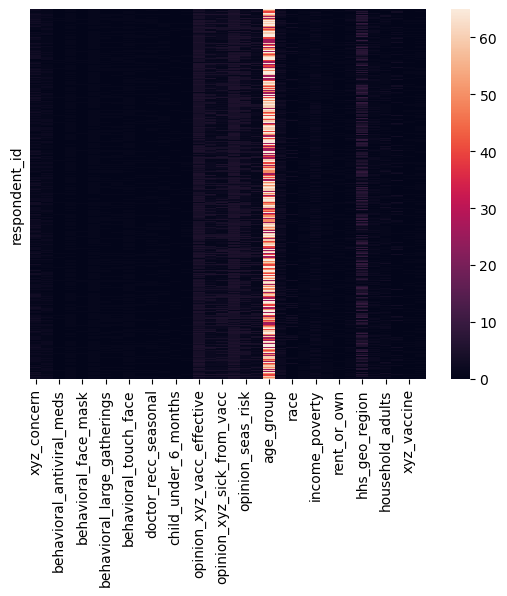

In [73]:
sns.heatmap(new_10,yticklabels=False)
new_10.info()